# Primera prueba:

I) Conocer cómo está compuesta la base de datos

(Carga de los modulos base)

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import tzinfo, timedelta, datetime
%matplotlib inline

In [3]:
df_train = pd.read_csv("./input-data/sf_train_fixed.csv",index_col=None)
print(df_train.dtypes)

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object


## Conclusiones:

1. Hay que predecir la categoría
2. Fechas absolutas, dividir según caso (día, mes, año)
3. Los distritos sólo son útiles en caso de georreferencia
4. La dirección es igual
5. X y Y son datos en latitud y logitud

# Segunda prueba:

II) Conocer cómo está compuesto el crimen a lo largo del año

In [4]:
train = pd.read_csv('./input-data/sf_train.csv', parse_dates=['Dates'])

train['DayOfYear'] = train['Dates'].map(lambda x: x.strftime("%m-%d"))
train['DayOfWeek'] = train['Dates'].map(lambda x: x.strftime("%u"))
train['MonthOfYear'] = train['Dates'].map(lambda x: x.strftime("%m"))
train['TimeOfYear'] = train['Dates'].map(lambda x: x.strftime("%H"))

* Determinar la serie de los días del año.
* Determinar la relevancia de los días de la semana.
* Determinar la relevancia del mes del año.
* Determinar la relevancia de la hora del día.

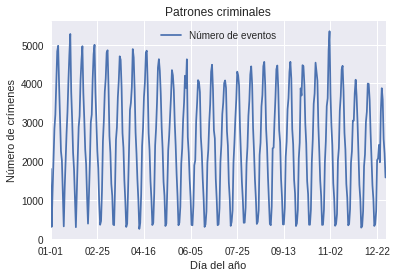

In [5]:
df_global = train[['Category','DayOfYear']].groupby(['DayOfYear']).count()
df_global.plot(y='Category', label='N\u00famero de eventos', figsize=(6,4)) 
plt.title("Patrones criminales")
plt.ylabel('N\u00famero de cr\u00edmenes')
plt.xlabel('D\u00eda del a\u00f1o')
plt.grid(True)
plt.savefig('./output-data/Distribution_of_Crimes_by_Day_Year.png')

**Conclusiones:** *Simula una serie armónica.* Repite un patrón a la mitad del mes y al fin del mismo.

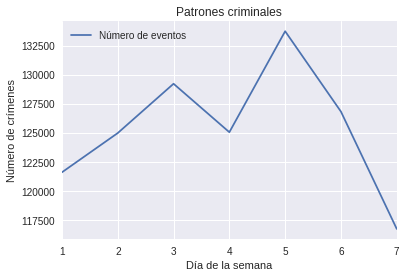

In [8]:
df_global = train[['Category','DayOfWeek']].groupby(['DayOfWeek']).count()
df_global.plot(y='Category', label='N\u00famero de eventos', figsize=(6,4)) 
plt.title("Patrones criminales")
plt.ylabel('N\u00famero de cr\u00edmenes')
plt.xlabel('D\u00eda de la semana')
plt.grid(True)
plt.savefig('./output-data/Distribution_of_Crimes_by_Day_Week.png')

**Conclusiones:** *Se focalizan los crímenes en miércoles y viernes.* Detallar cuales y los tipos.

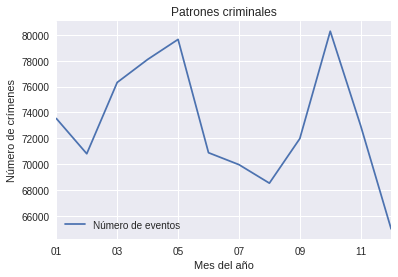

In [10]:
df_global = train[['Category','MonthOfYear']].groupby(['MonthOfYear']).count()
df_global.plot(y='Category', label='N\u00famero de eventos', figsize=(6,4)) 
plt.title("Patrones criminales")
plt.ylabel('N\u00famero de cr\u00edmenes')
plt.xlabel('Mes del a\u00f1o')
plt.grid(True)
plt.savefig('./output-data/Distribution_of_Crimes_by_Month_Year.png')

**Conclusiones:** *Se focalizan los crímenes en mayo y octubre.* Detallar cuales y los tipos.

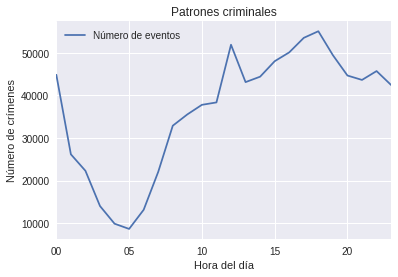

In [11]:
df_global = train[['Category','TimeOfYear']].groupby(['TimeOfYear']).count()
df_global.plot(y='Category', label='N\u00famero de eventos', figsize=(6,4)) 
plt.title("Patrones criminales")
plt.ylabel('N\u00famero de cr\u00edmenes')
plt.xlabel('Hora del d\u00eda')
plt.grid(True)
plt.savefig('./output-data/Distribution_of_Crimes_by_Hour_Year.png')

**Conclusiones:** *A partir del medio día los crímenes fluctuan y alcanzan su máximo a las 18 hrs.* Detallar cuales y los tipos.

## Conclusiones:
1. El primer patrón que presenta el crimen es estacional y dos veces por mes.
2. Miércoles y viernes son los días más peligrosos
3. Mayo y Octubre son los meses más peligrosos
4. Medio día, 6 de la tarde y media noche son las horas más peligrosas

## Hipótesis:
1. La primera quincena (mitad de mes) y la segunda quincena (fin de mes) está asociado a tipos de crímenes
2. Los días de paga están más unidos a ciertos crímenes
3. Hay un patrón cada 6 horas de día tres veces: 12, 18 y 24 horas.

# Tercera prueba:

III) Conocer cómo está compuesto el crimen en sus categorías y a lo largo del día

In [21]:
Crime_Categories = list(df_train.loc[:,"Category"].unique())
print("N\u00famero de categor\u00edas: " + str(len(Crime_Categories)))
for crime in Crime_Categories:
    print(crime)

Número de categorías: 39
WARRANTS
OTHER OFFENSES
LARCENY-THEFT
VEHICLE THEFT
VANDALISM
NON-CRIMINAL
ROBBERY
ASSAULT
WEAPON LAWS
BURGLARY
SUSPICIOUS OCC
DRUNKENNESS
FORGERY-COUNTERFEITING
DRUG-NARCOTIC
STOLEN PROPERTY
SECONDARY CODES
TRESPASS
MISSING PERSON
FRAUD
KIDNAPPING
RUNAWAY
DRIVING UNDER THE INFLUENCE
SEX OFFENSES FORCIBLE
PROSTITUTION
DISORDERLY CONDUCT
ARSON
FAMILY OFFENSES
LIQUOR LAWS
BRIBERY
EMBEZZLEMENT
SUICIDE
LOITERING
SEX OFFENSES NON FORCIBLE
EXTORTION
GAMBLING
BAD CHECKS
TREA
RECOVERED VEHICLE
PORNOGRAPHY-OBSCENE MAT


**Conclusiones:** *Hay 39 tipos diferentes de crimen. No todos son prioritarios.*

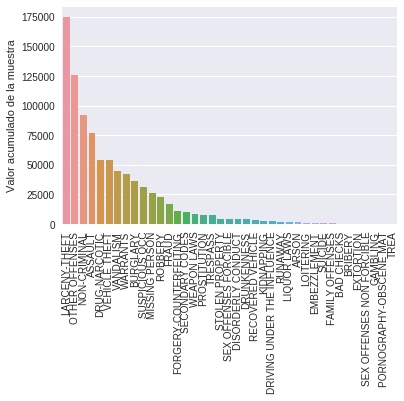

In [15]:
number_of_crimes = df_train.Category.value_counts()
most_dangerous_districts = df_train.PdDistrict.value_counts()
n_crime_plot = sns.barplot(x=number_of_crimes.index,y=number_of_crimes)
n_crime_plot.set_xticklabels(number_of_crimes.index,rotation=90)
n_crime_plot.set(ylabel='Valor acumulado de la muestra')
fig = n_crime_plot.get_figure()
fig.savefig("./output-data/Composici\u00f3n del crimen en SF.png",bbox_inches='tight')

**Conclusiones:** *Los crímenes se concentran. Determinar por acumulación relativa cuáles son prioritarios.*

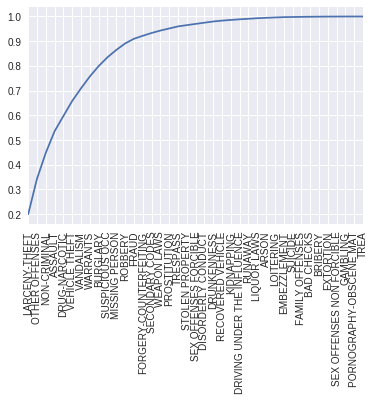

In [17]:
relative_crime = number_of_crimes / sum(number_of_crimes)
relative_crime = relative_crime.cumsum()
r_crime_plot = sns.tsplot(data=relative_crime)
r_crime_plot.set_xticklabels(relative_crime.index,rotation=90)
r_crime_plot.set_xticks(np.arange(len(relative_crime)))
fig = r_crime_plot.get_figure()
fig.savefig("./output-data/Composici\u00f3n porcentual del crimen en SF.png",bbox_inches='tight')

In [20]:
SubCrime_Categories = list(relative_crime[0:12].index)
print("Las siguientes categorías :")
print(SubCrime_Categories)
print("constituyen el {:.2%} del total de crimenes".format(relative_crime[12]))

Las siguientes categorías :
['LARCENY-THEFT', 'OTHER OFFENSES', 'NON-CRIMINAL', 'ASSAULT', 'DRUG-NARCOTIC', 'VEHICLE THEFT', 'VANDALISM', 'WARRANTS', 'BURGLARY', 'SUSPICIOUS OCC', 'MISSING PERSON', 'ROBBERY']
constituyen el 90.97% del total de crimenes


**Conclusiones:** *Sólo 12 crímenes son prioritarios, ya que constituyen el 90% de total registrado.*

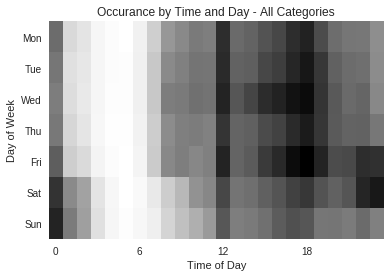

In [23]:
day_week = {
    'Monday':0,
    'Tuesday':1,
    'Wednesday':2,
    'Thursday':3,
    'Friday':4,
    'Saturday':5,
    'Sunday':6
}

df_train['DOW'] = df_train.DayOfWeek.map(day_week)
df_train['hour'] = pd.to_datetime(df_train.Dates).dt.hour

plt.figure(1,figsize=(6,4))
plt.hist2d(
    df_train.hour.values,
    df_train.DOW.values,
    bins=[24,7],
    range=[[-0.5,23.5],[-0.5,6.5]]
)
plt.xticks(np.arange(0,24,6))
plt.xlabel('Time of Day')
plt.yticks(np.arange(0,7),['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.ylabel('Day of Week')
plt.gca().invert_yaxis()
plt.title('Occurance by Time and Day - All Categories')
plt.grid(False)

**Conclusiones:** *El mapa de calor para todos los crímenes por día, confirma las horas y días de la semana.*

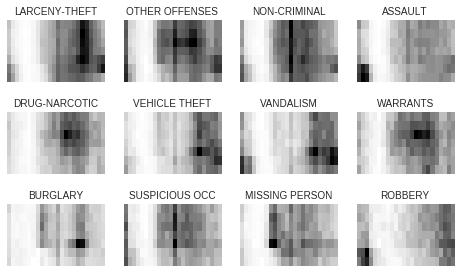

In [25]:
plt.figure(2,figsize=(8,4.5))
plt.subplots_adjust(hspace=0.5)
for i in np.arange(1,len(SubCrime_Categories) + 1):
    ax = plt.subplot(3,4,i)
    ax.set_title(SubCrime_Categories[i - 1],fontsize=10)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.hist2d(
        df_train[df_train.Category==SubCrime_Categories[i - 1]].hour.values,
        df_train[df_train.Category==SubCrime_Categories[i - 1]].DOW.values, 
        bins=[24,7],
        range=[[-0.5,23.5],[-0.5,6.5]]
    )
    plt.gca().invert_yaxis()

**Conclusiones:** *El mapa de calor para todos los 12 crímenes prioritarios revela:*
* Robo está concentrado en torno a las 18 hrs.
* Otro tipo de faltas ente las 12 hrs. y las 18 hrs.
* Agresiones se concentran en el fin de semana en torno de las 0 hrs.
* Narcotráfico a inicios de semana entre las 12hrs y las 15 hrs.
* El robo de vehículos se realiza después de las 18 hrs.
* Los actos vandálicos son cerca del fin de semana y después de las 18 hrs.
* La ejecución de mandamientos judiciales son a inicios de semana alrededor de las 18 hrs.
* Los ayanamientos son los viernes a las 18 hrs.
* Las actividades sospechosas son a las 0 hrs. y 12 hrs.
* Las personas desaparecidas son por las mañana 6 hrs.
* El robose concentra el fin de semana a las 3 hrs.

## Conclusiones:
1. A partir del medio día hay más probabilidad de courrencia.
2. Hay crímenes que por su naturaleza de identificación suceden por la noche

## Hipótesis:
1. Hay distritos más peligrosos que otros

# Cuarta prueba:

IV) Conocer cómo está compuesto el crimen en sus categorías por distritos

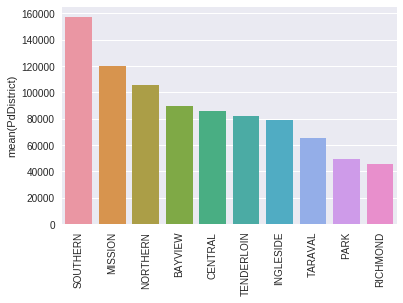

In [27]:
dist_crime_plot = sns.barplot(x=most_dangerous_districts.index,y=most_dangerous_districts)
dist_crime_plot.set_xticklabels(most_dangerous_districts.index,rotation=90)

fig = dist_crime_plot.get_figure()
fig.savefig("./output-data/Composici\u00f3n por zonas en SF.png",bbox_inches='tight')

**Conclusiones:** *El histograma de medias revela que sí hay una diferencia de ocurrencia del crímen. Pero no tan marcada para eliminar distritos.*

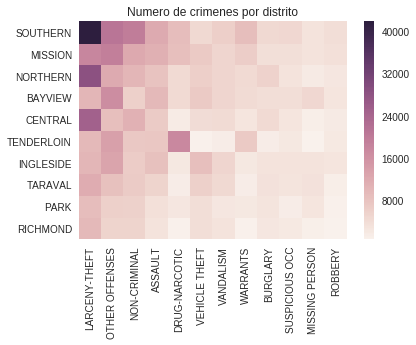

In [31]:
prevalent_crime = pd.pivot_table(df_train,index="PdDistrict",columns="Category",aggfunc=len,fill_value=0)["Dates"]
pc_heat = prevalent_crime.loc[most_dangerous_districts.index,number_of_crimes.index]
pc_heat = pc_heat[(SubCrime_Categories)]

ax = sns.heatmap(pc_heat)
ax.set_title("Numero de crimenes por distrito")

fig = ax.get_figure()
fig.savefig("./output-data/Composici\u00f3n calorica por zonas en SF.png",bbox_inches='tight')

**Conclusiones:** *El mapa de calor revela la concentración de crímenes. Pero no su segregación.*

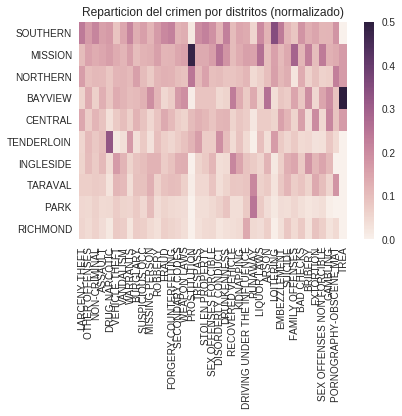

In [37]:
prevalent_crime2 = pd.pivot_table(df_train,index="PdDistrict",columns="Category",aggfunc=len,fill_value=0)["Dates"]
pc_heat_tot = prevalent_crime2/prevalent_crime2.sum(axis = 0)
pc_heat_tot = pc_heat_tot.loc[most_dangerous_districts.index,number_of_crimes.index]
ax = sns.heatmap(pc_heat_tot)
ax.set_title("Reparticion del crimen por distritos (normalizado)")

fig = ax.get_figure()
fig.savefig("./output-data/Composici\u00f3n calorica normalizada en SF.png",bbox_inches='tight')

**Conclusiones:** *El mapa de calor revela la concentración de crímenes en los distritos:*
* TENDERLOIN: Es un distrito con crímenes de narcotráfico.
* MISSION: Es un distrito con crímenes de prostitución.
* SOUTHERN: Es un distrito de incendios provocados.

Entre otros.

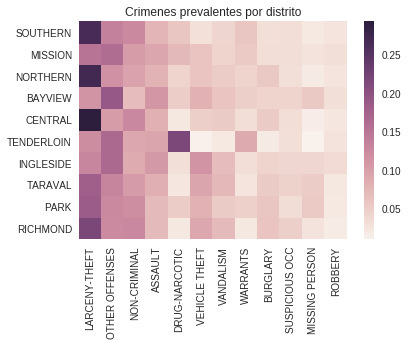

In [38]:
prevalent_crime3 = pd.pivot_table(df_train,index="PdDistrict",columns="Category",aggfunc=len,fill_value=0)["Dates"]
pc_heat_sub = prevalent_crime3.div(prevalent_crime3.sum(axis = 1),axis=0)
pc_heat_sub = pc_heat_sub.loc[most_dangerous_districts.index,number_of_crimes.index]
pc_heat_sub = pc_heat_sub[(SubCrime_Categories)]
ax = sns.heatmap(pc_heat_sub)
ax.set_title("Crimenes prevalentes por distrito")

fig = ax.get_figure()
fig.savefig("./output-data/Composici\u00f3n prevalente por distrito en SF.png",bbox_inches='tight')

**Conclusiones:** *El mapa de calor revela la concentración de crímenes de forma más proporcional para los crímenes de interés dentro de todos los distritos. Distinguiendo cuáles son más prevalentes por éstos mismos.*

## Conclusiones:
1. Los diferentes tipos de delitos son prevalentes en ciertos distritos:
    * Robos para los distritos: SOUTHERN, NORTHERN, CENTRAL
    * Narcóticos para el distrito de: TENDERLOIN
    * Otras faltas se concentran en: BAYVIEW

## Hipótesis:
1. Hay una distribución espacial y temporal del delito en cada distrito

# Quinta prueba:

V) Conocer cómo está compuesto el crimen en sus categorías por distritos (geoespacial y temporal)

## Setup

### Coordenadas, Fechas y Categorías

In [42]:
lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299)
clipsize = [[-122.5247, -122.3366],[ 37.699, 37.8299]]

drive_in = './input-data/'
drive_out = './output-data/'
train = pd.read_csv(drive_in+'sf_train_fixed.csv')

cats = list(set(train.Category))
mapdata = np.loadtxt(drive_in+"sf_map_copyright_openstreetmap.txt")

dates = []
datesAll = np.array([datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
            for date in train.Dates])

startDate = (np.min(datesAll)).date()
endDate = (np.max(datesAll)).date()
alldates = pd.bdate_range(startDate, endDate, freq="m")
dayDF = pd.DataFrame(np.NAN, index=alldates, columns=['x'])

### Ciclo para todas las categorías principales

Concentración espacial, promedio de tendencia móvil y mapa de calor temporal

La categoria DISORDERLY CONDUCT no es principal
La categoria DRIVING UNDER THE INFLUENCE no es principal
La categoria BAD CHECKS no es principal
La categoria PROSTITUTION no es principal
La categoria EMBEZZLEMENT no es principal
La categoria KIDNAPPING no es principal
La categoria SUICIDE no es principal
La categoria FAMILY OFFENSES no es principal
La categoria GAMBLING no es principal
La categoria ARSON no es principal
La categoria PORNOGRAPHY-OBSCENE MAT no es principal
La categoria EXTORTION no es principal
La categoria FRAUD no es principal
La categoria DRUNKENNESS no es principal
La categoria RECOVERED VEHICLE no es principal
La categoria SECONDARY CODES no es principal
La categoria SEX OFFENSES FORCIBLE no es principal
La categoria LOITERING no es principal
La categoria TRESPASS no es principal
La categoria RUNAWAY no es principal
La categoria LIQUOR LAWS no es principal
La categoria WEAPON LAWS no es principal
La categoria BRIBERY no es principal
La categoria TREA no es principa

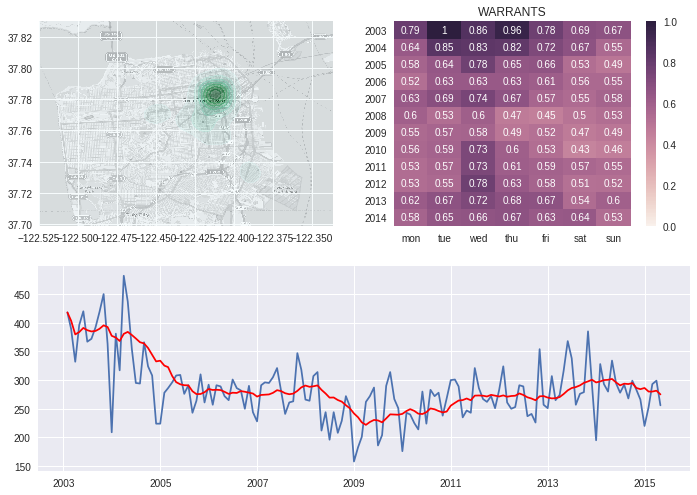

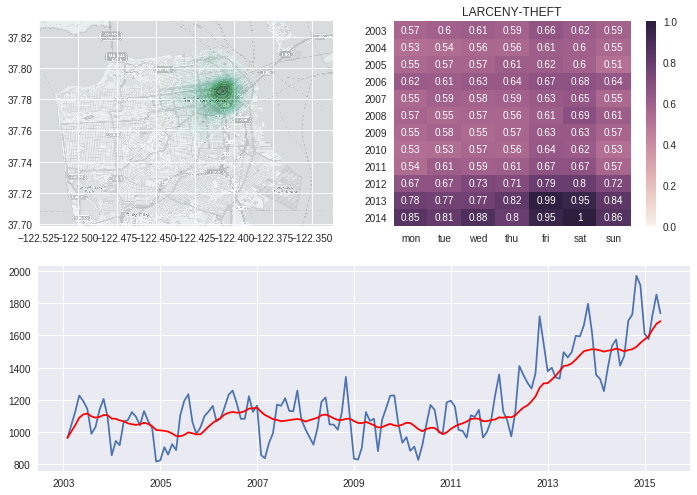

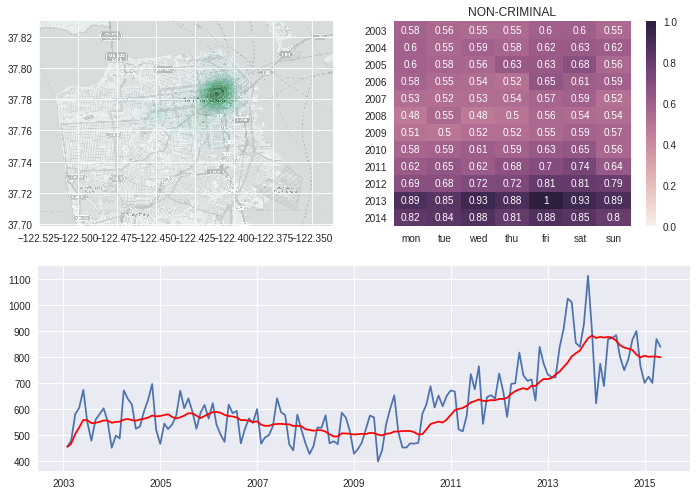

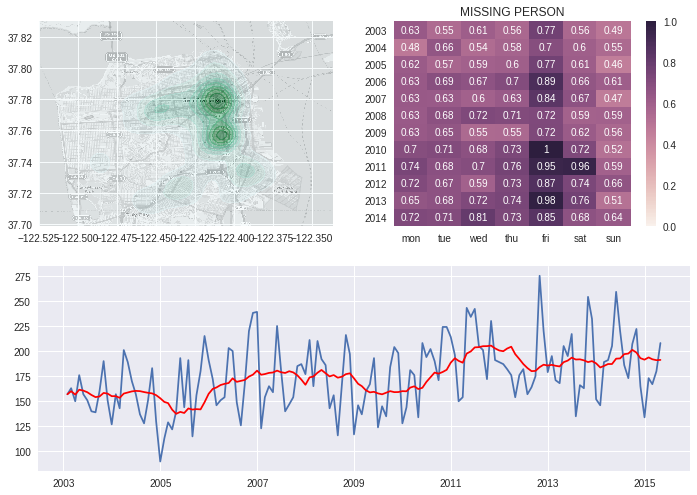

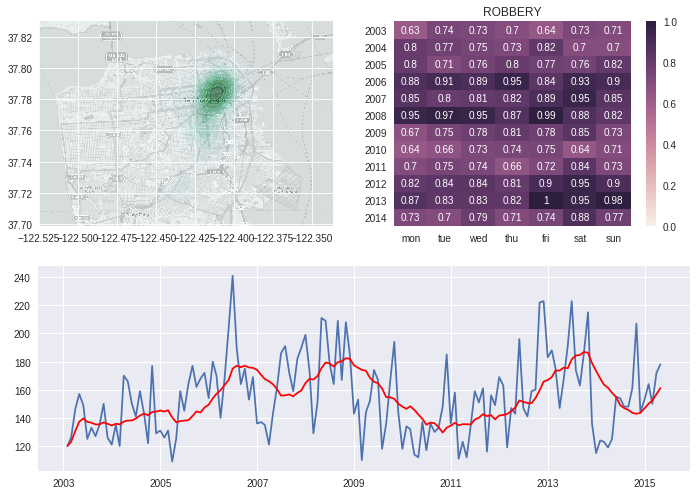

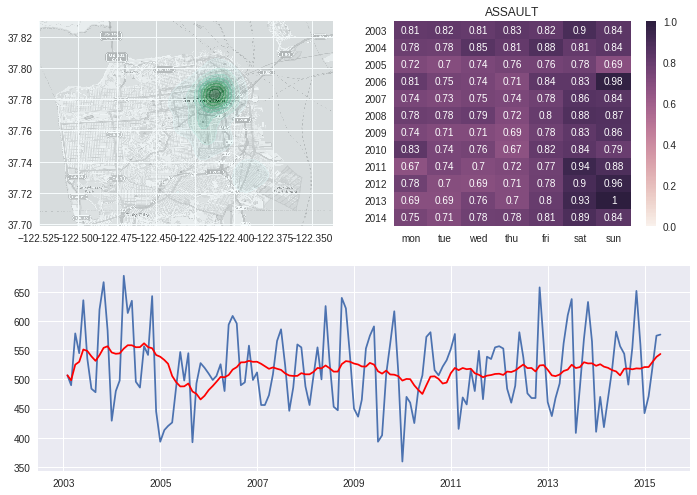

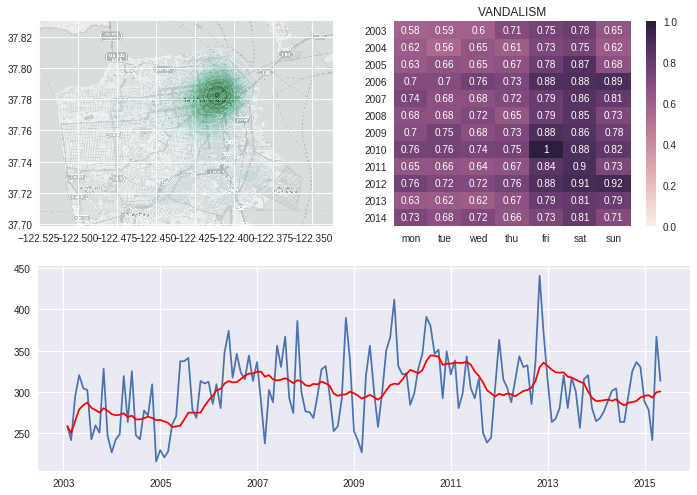

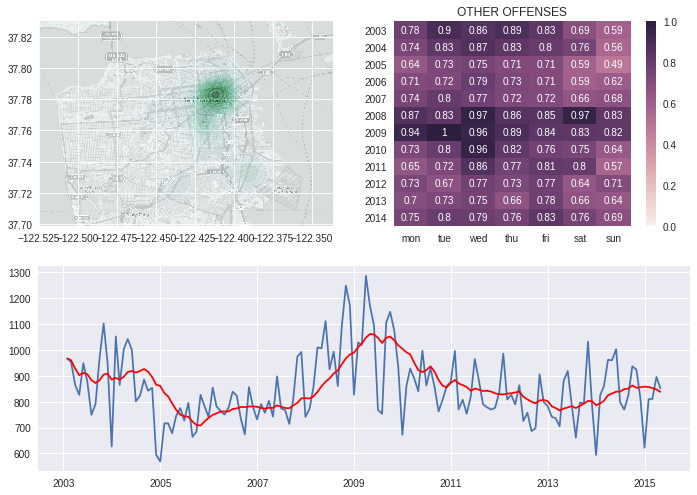

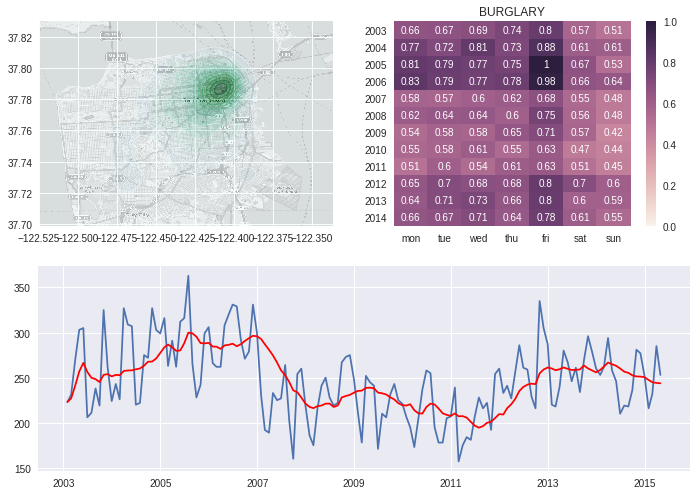

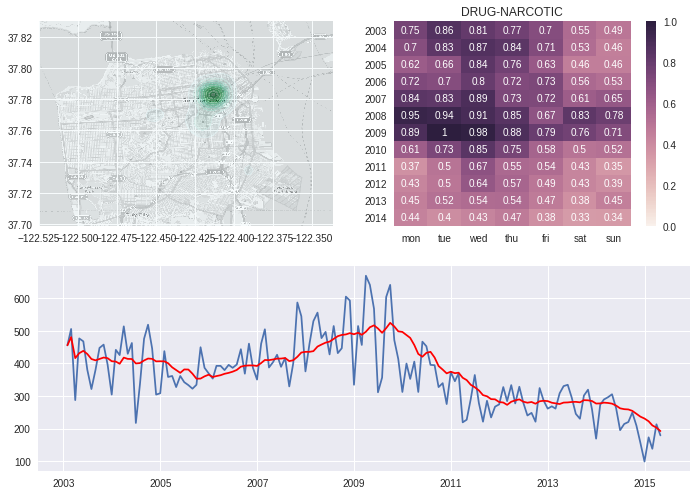

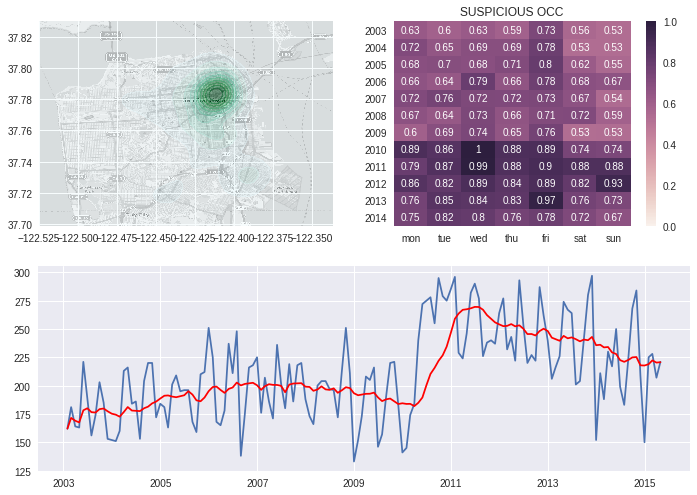

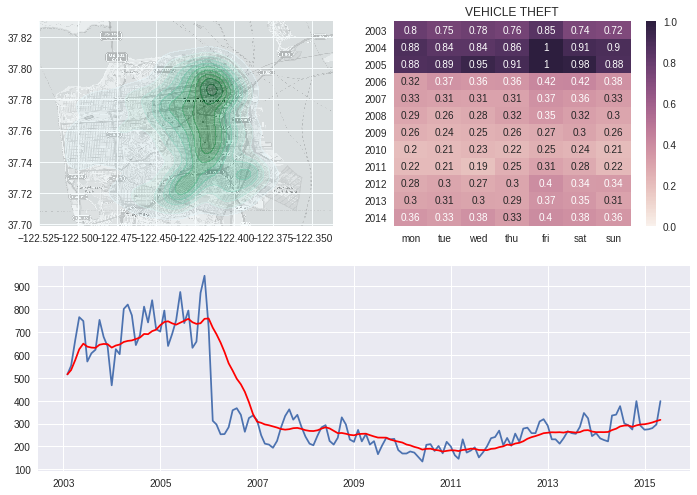

In [44]:
for cat in cats:
    saveFile = cat+'.png'
    if cat in SubCrime_Categories:
        fig = plt.figure(figsize = (11.69, 8.27))
        plt.title(cat)
        
################################################################################
        #ploteo
        ax = plt.subplot(2,2,1)
        ax.imshow(mapdata, cmap=plt.get_cmap('gray'), 
              extent=lon_lat_box)
    
        Xcoord = (train[train.Category==cat].X).values
        Ycoord = (train[train.Category==cat].Y).values
        dates = datesAll[np.where(train.Category==cat)]
        Z = np.ones([len(Xcoord),1])
            
        #dataframe
        df = pd.DataFrame([ [ Z[row][0],Xcoord[row],Ycoord[row]  ] for row in range(len(Z))],
               index=[dates[row] for row in range(len(dates))],
               columns=['z','xcoord','ycoord']) 
         
        df2 = df.resample('m').sum()
        
        #kernel density plot por periodo anual
        kdeMaxX = []
        kdeMaxY = []
        for yLoop in range(2003,2015):
            allData2 = df[(df.index.year == yLoop)]
                   
        sns.kdeplot(np.array(allData2['xcoord']), np.array(allData2['ycoord']),
                    shade=True, cut=10, clip=clipsize,alpha=0.5)

################################################################################  
        #Serie de tiempo uniforme
        allTimes = dayDF \
        .join(df2) \
        .drop('x', axis=1) \
        .fillna(0)
    
        movAv = pd.Series(allTimes['z']).rolling(window=12,min_periods=1).mean()
    
        #Serie de tiempo con promedio móvil
        ax = plt.subplot(2,1,2)
        plt.plot(allTimes.index,allTimes['z'])
        plt.plot(allTimes.index,movAv,'r')
        
        #Mapa de calor, día vs año
        ax = plt.subplot(2,2,2)
        heatData = []
        yLoopCount=0
        weekName = ['mon','tue','wed','thu','fri','sat','sun']
        yearName = ['2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']
        for yLoop in range(2003,2015):
            heatData.append([])
            for dLoop in range(7):
                allData3 = df[(df.index.year == yLoop) & (df.index.weekday == dLoop)]
                heatData[yLoopCount].append(sum(allData3['z'].values))
            yLoopCount+=1
        
        #normlizar
        heatData = np.array(heatData)/np.max(np.array(heatData))
        sns.heatmap(heatData, annot=True,xticklabels=weekName,yticklabels=yearName, vmin=0, vmax=1);

        plt.title(cat)
        plt.savefig(drive_out+saveFile)
        #print("La categoria {0} es relevante".format(cat))

    else:
        print("La categoria {0} no es principal".format(cat))